In [28]:
import pandas as pd
import numpy as np

In [19]:
#loading the dataset
df = pd.read_csv("songs_without_stopwords.csv", low_memory=False)   
#df = pd.read_csv("binary.csv", low_memory=False) 
df.head()

,index,Song_name,type,artist,lyrics
0,1,नीले नीले अम्बर पर,romantic,किशोर कुमार,नीले नीले अम्बर चाँद प्यार बरस तरस नीले नीले अ...
1,2,अक्कड़ बक्कड़,party,बादशाह,अक्कड़ बक्कड़ बॉम्बे बो पुरे रात बज पौ अक्कड़ ...
2,3,अखियाँ,sad,पोपोन,थक गेया अँख जग्ग दिय अख माह ना लभद अँखियाँहाये...
3,4,अंग से अंग लगाना,romantic,"अलका याग्निक, बिनोद राठौड़, सुदेश भोसले",आए आए चाहो बाँहो भर अंग अंग लग सजन रंग लग अंग ...
4,5,अगर ज़िन्दगी हो,romantic,आशा भोसले,ज़िन्दगी संग ज़िन्दगी संग मौत मौत ज़िन्दगी संग...


In [20]:
#define features andtags and split
from sklearn.model_selection import train_test_split
y = df.type
x=df.lyrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # use random number generator


In [21]:
#classify 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

rf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=150, max_depth=6, 
                                               random_state=0,class_weight = "balanced")),
               ])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
my_tags = ["sad", "romantic","party"]
accuracy=accuracy_score(y_pred, y_test)*100
print('accuracy %s' % accuracy)

accuracy 65.40880503144653


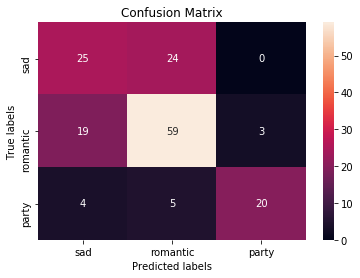

In [22]:
#print confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_test, y_pred, my_tags)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(my_tags); ax.yaxis.set_ticklabels(my_tags);

In [26]:
#CLASSIFICATION OF  SINGLE SONG

#song=[]
song=input('Enter song name for which you want to classify  :')

#series of both songname and lyrics
songlist=y = df.Song_name
lyric=y = df.lyrics
length=len(lyric)

#converting both to ndarray
sl=songlist.to_numpy()
l=lyric.to_numpy()
matched_index=0


i=0
#check for index of song
while i < length:
    if song == sl[i]:
        matched_index=i
    i += 1
print(f'{song} is present in songlist at indexes {matched_index}')



#fetching lyrics of that song
lyrics=l[matched_index]
#print(lyrics)

#creating series from string
list = [lyrics]
ser = pd.Series(list)
print(ser)

#predicting mood of that song
y_pred = rf.predict(ser)
print(y_pred)

#मिले हो तुम हमको
#फर्स्ट क्लास
#महरमा
#हमनवा मेरे

Enter song name for which you want to classify  :अगर तुम साथ हो
अगर तुम साथ हो is present in songlist at indexes 7
0    पल भर ठहर दिल संभल रोका आता ग़म फिसल आँख भरूं ब...
dtype: object
['sad']


In [27]:
lyric_pred='अरे जुम्मे की रात है अरे जुम्मे की रात है अल्लाह बचाए मुझे तेरे वार से जुम्मे की रात है चुम्मे की बात है अल्लाह बचाए मुझे तेरे वार से जाने क्या होना है जाने क्या खोना है तेरी जवानी तो जादू है टोना है जलवों में आंधी है अंधी में तूफ़ान है करदे ना मुझको तबाह सारी की सारी है तू गोलाबारी की मुश्क़िल है ख़ुद को बचाना मार ही ना डाले मेरी जान निकाले उफ़ अल्लाह बचाए मुझे हाय तेरे प्यार से जुम्मे की रात है चुम्मे की बात है अल्लाह बचाए मुझे तेरे वार से  माना तुझ में गज़ब का नशा तुझपे कोई भी होगा फ़िदा लेकिन ना खेल दिल से मेरे मैं तो दिल से भी हूँ सिरफिरा इक मैं बात कहूँ दो पल साथ रहूँ फिर मैं अगले ही पल हूँ हवा किया जो कुछ भी कहीं मुझे कुछ याद नहीं करूँ मैं क्या ये मुझे तू बता  सारी की सारी है तू गोलाबारी की मुश्क़िल है ख़ुद को बचाना मार ही ना डाले मेरी जान निकाले उफ़ अल्लाह बचाए मुझे हाय तेरे प्यार से जुम्मे की रात है चुम्मे की बात है अल्लाह बचाए मुझे तेरे वार से  हे जानू तेरी मैं बेमानियां चाहे करले तू शैतानियाँ ज़िद्द पे अड़ जाउंगी आज मैं अब करुँगी मैं मनमानियां नज़रें तुझपे मेरी ले लूं मैं जान तेरी पीछा ना छोडूं तेरा मैं यहां प्यार में दूंगी सज़ा मुझसे बचके तू दिखा आज तू जाने वाला है कहाँ  सारी की सारी है तू गोलाबारी की मुश्क़िल है ख़ुद को बचाना मार ही ना डाले मेरी जान निकाले उफ़ अल्लाह बचाए मुझे हाय तेरे प्यार से जुम्मे की रात है चुम्मे की बात है अल्लाह बचाए मुझे तेरे वार से'
daa=np.array([lyric_pred])
ser=pd.Series(daa,index=[0])
y_pred = rf.predict(ser)
print(y_pred)

['party']
